In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from transformers import pipeline, BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForSequenceClassification

c:\Users\richa\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [4]:
model = BertForSequenceClassification.from_pretrained("ProsusAI/finbert",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ProsusAI/finbert")

In [5]:
nlp = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

In [6]:
res = nlp("DOGECOIN TO THE MOOOOONNNNNNN!!!!")
print(res)

[{'label': 'neutral', 'score': 0.8640334010124207}]


In [7]:
tests = ['I like mangos', 'NVDA Shares Soar with higher than expected earnings','Tesla stocks bullish after elon musk announces that he will take over mars',"Amazon Bearish after Jeff Bezos anounces his career as a physicist"]

In [8]:
test_sents = []
for string in tests:
    test_sents.append(nlp(string))
print(test_sents)

[[{'label': 'neutral', 'score': 0.9101503491401672}], [{'label': 'positive', 'score': 0.9478864073753357}], [{'label': 'positive', 'score': 0.5165778994560242}], [{'label': 'negative', 'score': 0.8729503750801086}]]


In [11]:
import yfinance as yf
ticker = yf.Ticker('META')
meta = ticker.history('30mo')
meta.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-10-06 00:00:00-04:00,329.390516,334.025613,325.454690,333.286407,26443000,0.0,0.0
2021-10-07 00:00:00-04:00,336.642816,338.480862,328.631327,328.871063,28307500,0.0,0.0
2021-10-08 00:00:00-04:00,331.158639,333.046620,328.361589,329.700165,15946100,0.0,0.0
2021-10-11 00:00:00-04:00,327.282754,330.109741,324.965206,325.105072,14708200,0.0,0.0
2021-10-12 00:00:00-04:00,322.687613,324.036188,317.033608,323.426819,31658700,0.0,0.0


In [13]:
meta.shape

(628, 7)

In [9]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

def web_scraper(input):
    finviz_url = "https://finviz.com/quote.ashx?t="
    ticker = input

    news_tables = {}

    url = finviz_url + ticker

    req = Request(url = url, headers = {'user-agent': 'mega-chonk'})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table = html.find(id = 'news-table')
    news_tables[ticker] = news_table
        
    parsed_data = []

    for ticker, news_table in news_tables.items():
        for row in news_table.findAll('tr'):
            title = row.a.text
            date_data = row.td.text
            date_data = re.sub(r"\r\n", "", date_data)
            date_data = re.sub(r"\s+", " ", date_data)
            date_data = re.sub(r"^\s|\s$", "", date_data)
            date_data = date_data.split(" ")

            if date_data[0].lower() == 'today':
                date_data[0]= date.today()
                time = date_data[1]
            if len(date_data) == 1:
                time = date_data[0]
            else:
                date_article = date_data[0]
                time = date_data[1]

            parsed_data.append([ticker, date_article, time, title])

    # print(parsed_data)

    df = pd.DataFrame(parsed_data, columns = ['ticker', 'date', 'time', 'title'])
    return df

In [10]:
class Sentiment_Analyzer:
    def __init__(self, weighting, model, tokenizer):
        self.weight = weighting
        self.model = model
        self.tokenizer = tokenizer
        self.nlp = pipeline("sentiment-analysis",model = self.model, tokenizer = self.tokenizer)
    def sentiment_label(self, title, nlp):
        results = nlp(title)
        label = results[0]['label']
        return label
    def sentiment_score(self, title, nlp):
        results = nlp(title)
        score= results[0]['score']
        return score
    def analyzer(self, df, ticker):
        df['Sentiment Label'] = df['title'].apply(lambda title: self.sentiment_label(title, self.nlp))
        df['Sentiment Score'] = df['title'].apply(lambda title: self.sentiment_score(title, self.nlp))
        net_sent_score = 0
        for row in range(df.shape[0]):
            if df.iloc[row]['Sentiment Label'] == 'negative':
                net_sent_score -= df.iloc[row]['Sentiment Score']
            elif df.iloc[row]['Sentiment Label'] == 'positive':
                net_sent_score += df.iloc[row]['Sentiment Score']
            else:
                pass
        net_sent_score = net_sent_score / df.shape[0]
        return self.weight*net_sent_score

In [11]:
finbert = Sentiment_Analyzer(1, model, tokenizer)

In [12]:
mung = finbert.nlp('I love amongus')
print(mung)

[{'label': 'neutral', 'score': 0.8766472935676575}]


In [23]:
ticker_list = ['NVDA', 'MSFT', 'ORCL', 'TSM', 'AVGO', 'ASML', 'AMD', 'CRM', 'ADBE', 'AAPL',
               'JPM', 'BAC', 'WFC', 'AXP', 'BX', 'MS', 'HSBC', 'RY', 'MA', 'V',
               'LLY', 'NVO', 'UNH', 'JNJ', 'ABBV', 'MRK', 'TMO', 'AZN', 'ABT', 'NVS',
                'GE', 'CAT', 'UNP', 'UPS', 'HON','RTX','ETN','DE','BA','LMT',
                'AMZN', 'TSLA', 'HD', 'TM', 'MCD','BABA','PDD','LOW','NKE','BKNG',
                'LIN', 'BHP', 'RIO', 'SHW', 'SCCO','FCX','ECL','CRH','APD','VALE',
                'PLD', 'AMT', 'EQIX', 'SPG', 'WELL','PSA','O','DLR','CCI','CSGP',
                'GOOGL', 'META', 'NFLX', 'DIS', 'TMUS','VZ','CMCSA','T','RELX','SPOT',
                'XOM', 'CVX', 'SHEL', 'TTE', 'COP','BP','PBR','CNQ','EQNR','MPC',
                'WMT', 'PG', 'COST', 'KO', 'PEP','PM','BUD','UL','MDLZ','DEO',
                'NEE', 'SO', 'DUK', 'CEG', 'NGG','SRE','AEP','D','EXC','PCG',
               ]

In [14]:
ticker = 'META'
finbert.analyzer(web_scraper(ticker), ticker)

-0.006030586957931519

In [25]:
score_dis_finbert = pd.DataFrame({'Score':[]})

In [26]:
for symbol in ticker_list:
    score = finbert.analyzer(web_scraper(symbol),symbol)
    new_row = {'Score':score}
    score_dis_finbert.loc[len(score_dis_finbert)] = new_row
    print(f'{symbol}: {score}')

NVDA: -0.01930225133895874
MSFT: -0.11872526288032531
ORCL: 0.1320860430598259
TSM: -0.04832781821489334
AVGO: 0.21928513050079346
ASML: 0.0868469911813736
AMD: -0.16890289962291719
CRM: 0.046415905952453616
ADBE: -0.0871883600950241
AAPL: -0.16058723896741867
JPM: -0.0555382364988327
BAC: -0.0920705395936966
WFC: -0.08290811449289322
AXP: 0.10253255486488343
BX: 0.02627530097961426
MS: -0.0172734397649765
HSBC: -0.013246671557426452
RY: -0.012691229283809662
MA: 0.1674931412935257
V: 0.06696222484111786
LLY: -0.04775205761194229
NVO: 0.10153740137815476
UNH: -0.2161150985956192
JNJ: 0.09514287412166596
ABBV: 0.10496597945690155
MRK: 0.26212720096111297
TMO: -0.019492469429969787
AZN: 0.2880526149272919
ABT: 0.1524798008799553
NVS: -0.016481006145477296
GE: 0.050961278080940246
CAT: 0.03500261336565018
UNP: -0.13786893367767333
UPS: 0.11716000616550445
HON: 0.09471730291843414
RTX: 0.26571345269680025
ETN: 0.24600686967372895
DE: -0.14783135592937469
BA: -0.2739456620812416
LMT: 0.2333

In [28]:
tokenizer_bert = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model_bert = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [29]:
bert = Sentiment_Analyzer(1, model_bert, tokenizer_bert)

In [30]:
score_dis_bert = pd.DataFrame({'Score':[]})

In [34]:
bert.nlp('mungus')

[{'label': '5 stars', 'score': 0.29767200350761414}]

In [31]:
for symbol in ticker_list:
    score = bert.analyzer(web_scraper(symbol),symbol)
    new_row = {'Score':score}
    score_dis_bert.loc[len(score_dis_bert)] = new_row
    print(f'{symbol}: {score}')

NVDA: 0.0
MSFT: 0.0


KeyboardInterrupt: 

<Axes: ylabel='Count'>

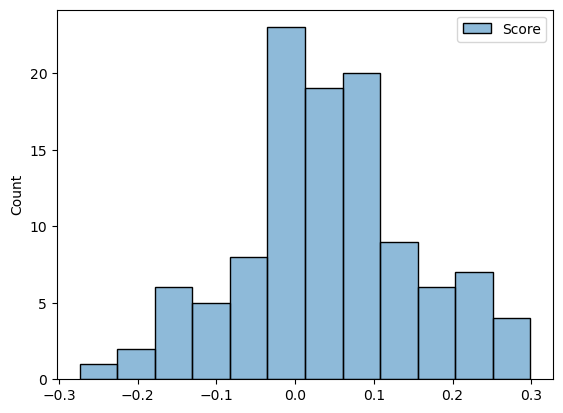

In [27]:
import seaborn as sns

sns.histplot(score_dis_finbert)